In [1]:
import torch
from torch import nn, optim
from test_data import *

tensor([ 9, 10,  1,  4,  7,  0,  5,  8,  2])
tensor([3, 6])


In [2]:
tc = tc.unsqueeze(1)
tu = tu.unsqueeze(1)
tu.shape

torch.Size([11, 1])

In [3]:
def train_loop(n, optimizer, model, lossfn, traintu, valtu, traintc, valtc):
    for e in range(1, n + 1):
        traintp = model(traintu)
        losstrain = lossfn(traintp, traintc)

        valtp = model(valtu)
        lossval = lossfn(valtp, valtc)

        optimizer.zero_grad()
        losstrain.backward()
        optimizer.step()

        if e < 6 or e % 1000 == 0:
            print(
                f"Epoch {e}, training loss {losstrain.item():.6f}",
                f"     validation loss {lossval.item():.4f}",
            )

In [4]:
traintu = tu[train_idx].unsqueeze(1)
valtu = tu[val_idx].unsqueeze(1)
traintc = tc[train_idx].unsqueeze(1)
valtc = tc[val_idx].unsqueeze(1)


traintun = traintu * 0.1
traintcn = traintc * 0.1

valtun = valtu * 0.1
valtcn = valtc * 0.1

In [5]:
from collections import OrderedDict

sql_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 8)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(8, 1)),
        ]
    )
)
sql_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [6]:
optimizer = optim.SGD(sql_model.parameters(), lr=1e-3)

train_loop(
    n=5000,
    optimizer=optimizer,
    model=sql_model,
    lossfn=nn.MSELoss(),
    traintu=traintun,
    valtu=valtun,
    traintc=traintc,
    valtc=valtc,
)

Epoch 1, training loss 138.116394      validation loss 391.5503
Epoch 2, training loss 135.404160      validation loss 387.0549
Epoch 3, training loss 132.758026      validation loss 382.6482
Epoch 4, training loss 130.178741      validation loss 378.3327
Epoch 5, training loss 127.666626      validation loss 374.1099
Epoch 1000, training loss 3.819711      validation loss 45.0310
Epoch 2000, training loss 2.467637      validation loss 28.1322
Epoch 3000, training loss 1.935727      validation loss 20.2205
Epoch 4000, training loss 2.365586      validation loss 13.4868
Epoch 5000, training loss 1.957776      validation loss 12.5652


In [8]:
print("answer", valtc)

answer tensor([[[28.]],

        [[ 3.]]])


In [9]:
print("hidden", sql_model.hidden_linear.weight.grad)

hidden tensor([[ -0.0328],
        [-17.9853],
        [-12.3858],
        [  8.0885],
        [  0.0996],
        [ 14.5978],
        [ -0.1075],
        [ 18.1438]])


In [10]:
from matplotlib import pyplot as plt

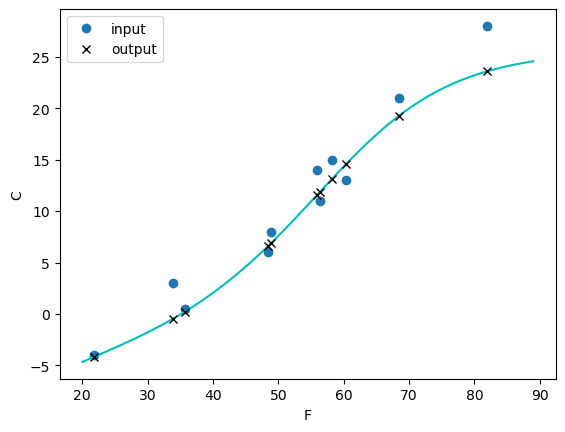

In [11]:
trange = torch.arange(20.0, 90.0).unsqueeze(1)
fig = plt.figure()
plt.xlabel("F")
plt.ylabel("C")
plt.plot(tu, tc, "o", label="input")
plt.plot(trange, sql_model(0.1 * trange).detach(), "c-")
plt.plot(tu, sql_model(0.1 * tu).detach(), "kx", label="output")
plt.legend(loc="best")